# Laptop price predictor 
In this note book we will make a predictor to predict the price of a laptop giving some characteristics. In this project we will perform a lot of preprocessing and exploratory data analysis.

## First view

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Importing the data from csv

In [26]:
df = pd.read_csv("laptop_data.csv",index_col=0)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,9279.228816
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,6226.418016


In [27]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [28]:
df.shape

(1303, 11)

We have 11 characteristics on this dataset, but some of them have grouped information, we will deal with them in the EDA.

Lets get some more information about this dataset.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


It looks like we have no null values

In [30]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

So this is a near perfect dataset, its awsome for academic research and to get some knowledge on how things work, the only problem is that you rarely come across data like this as it usually needs to be cleaned and processed

Now lets see the unique values that we have

In [31]:
for col in df.columns:
    if col!='Price':
        print(f'{col} colum has {df[col].unique().size} unique elements'+'__'*20,f'\nUnique values in {col}:\n {df[col].unique()}\n')

Company colum has 19 unique elements________________________________________ 
Unique values in Company:
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

TypeName colum has 6 unique elements________________________________________ 
Unique values in TypeName:
 ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Inches colum has 18 unique elements________________________________________ 
Unique values in Inches:
 [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]

ScreenResolution colum has 40 unique elements________________________________________ 
Unique values in ScreenResolution:
 ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1


As we can observe; `Ram`, `Memory` and `Weight` are numerical data but have a unit attached, lets fix that

In [32]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Ram']=df['Ram'].astype('int32')
df=df.rename(columns={"Ram": "Ram (GB)"})
df['Weight']=df['Weight'].str.replace('kg','')
df['Weight']=df['Weight'].astype('float64')

df=df.rename(columns={"Weight": "Weight (kg)"})

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,9279.228816
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,6226.418016
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,3982.680000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,17575.393680
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,12492.455040


## Exploratory Data Analysis

### Numerical data

In [34]:
df.describe()

,Inches,Ram (GB),Weight (kg),Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,7783.105578
std,1.426304,5.084665,0.665475,4841.616232
min,10.100000,2.000000,0.690000,1205.193600
25%,14.000000,4.000000,1.500000,4148.913600
50%,15.600000,8.000000,2.040000,6767.092800
75%,15.600000,8.000000,2.300000,10305.652032
max,18.400000,64.000000,4.700000,42244.113600


#### Discrete data 


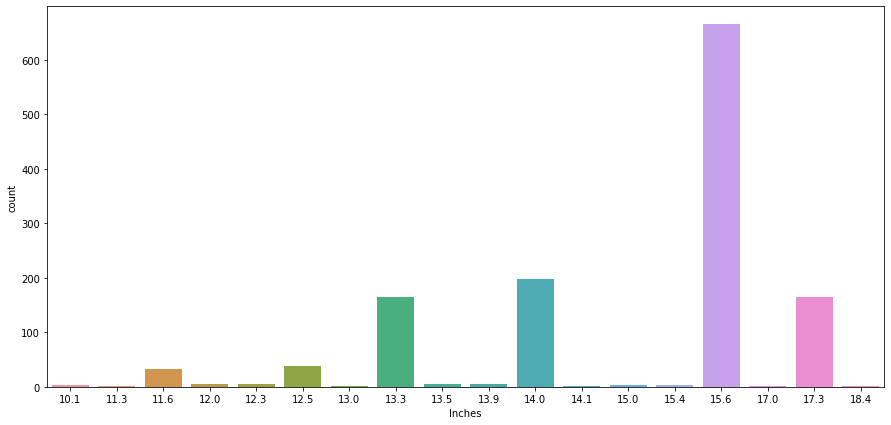

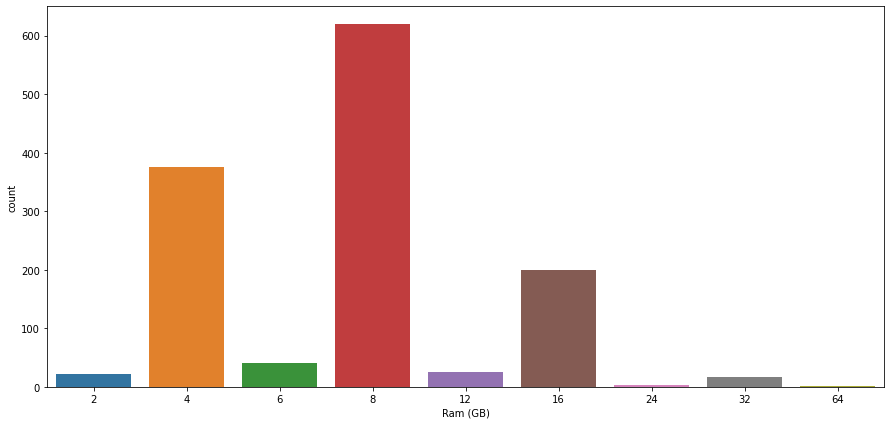

In [35]:
for variable in ['Inches','Ram (GB)']:
       plt.figure(figsize=(15,7))
       sn.countplot(x=variable,data = df)

These graphs tell us that people prefere laptops with 15.6" displays, and laptops with 8GB of Ram are the most bought.

#### Continuous data 

Let's take a plot the Price and weight counts

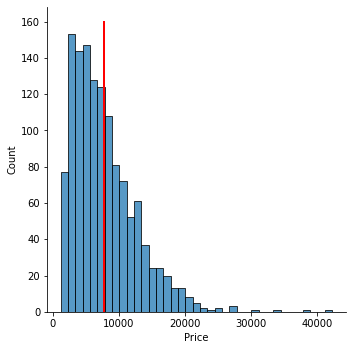

In [36]:
sn.displot(df['Price'])
plt.plot([df['Price'].mean(), df['Price'].mean()], [160, 0],color='red', linewidth=2)

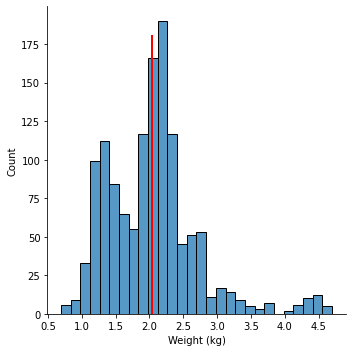

In [37]:
sn.displot(df['Weight (kg)'])
plt.plot([df['Weight (kg)'].mean(), df['Weight (kg)'].mean()], [180, 0],color='red' ,linewidth=2)


We observer that weight is unevenly spread so the mean doesn't give a useful information, we can see that this data has a some laptops whos weight is more than 4kg but are still sold, we can probably say that these laptops are the workstation.

### Categorical data

Let's plot some of these variables

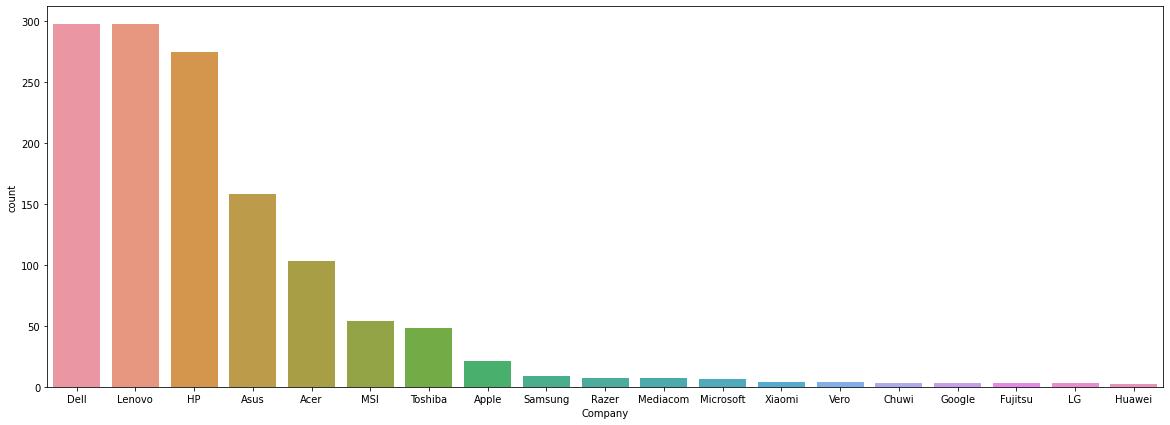

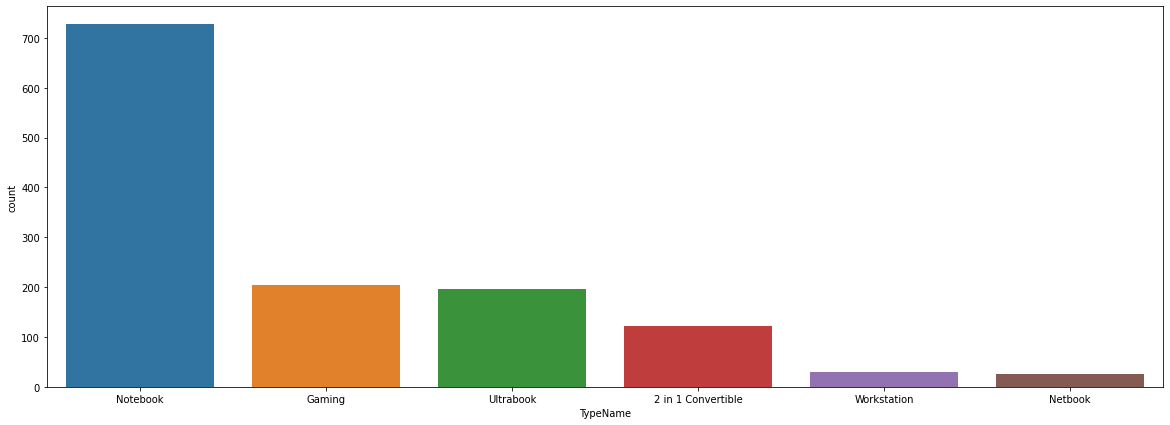

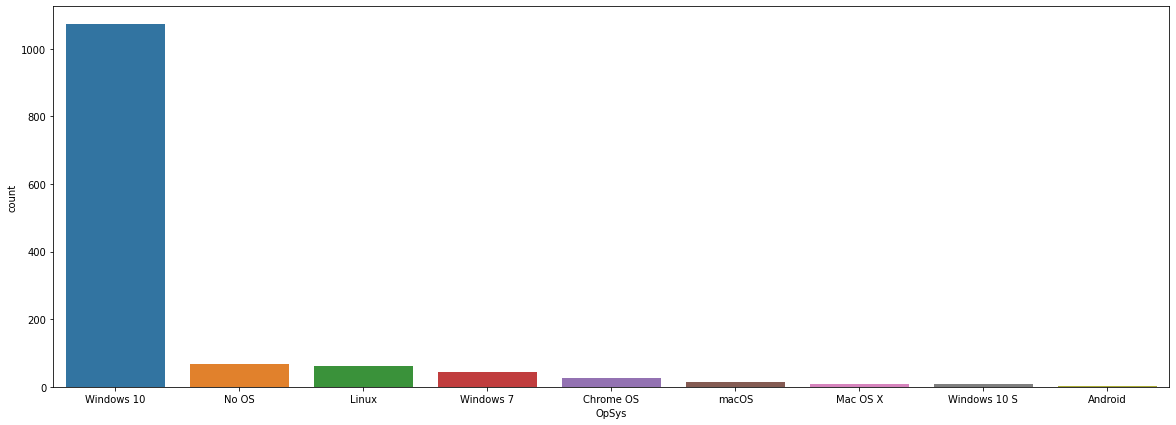

In [38]:
Categorical=['Company', 'TypeName', 'OpSys']

for variable in Categorical:
       plt.figure(figsize=(20,7))
       sn.countplot(x=variable,data = df, order =df[variable].value_counts().index)

From these graphs we can see that windows 10 is the most popular OS in the dataset. We can also observe that Dell and Lenovo are fighting for the most popular brand, notebooks are the most popular type sold.

Let's explore more about each company and their prices

<AxesSubplot:xlabel='Company', ylabel='Price'>

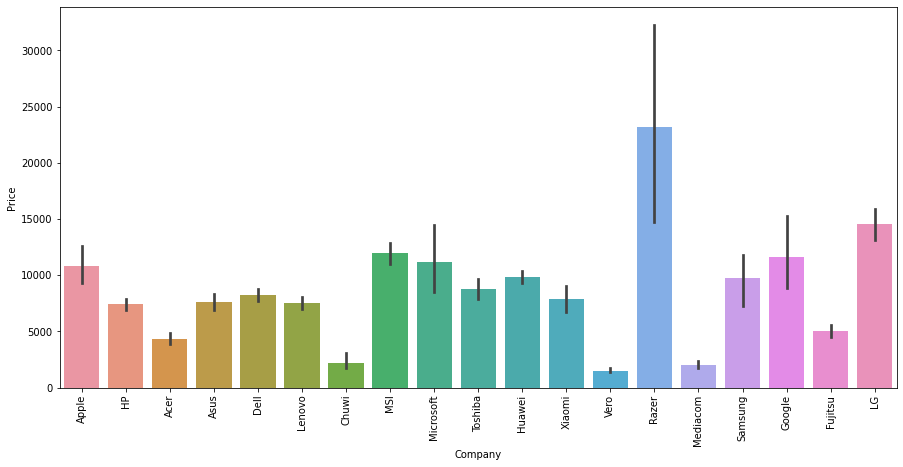

In [39]:
plt.figure(figsize=(15,7))
plt.xticks(rotation='vertical')
sn.barplot(x = df['Company'],y = df['Price'])

We observe that Razor product have the most variation in price; peaking at 42244.11 MAD and reaching a bottom at 7127.26 MAD with a mean of 23176.72 MAD.

Now let's see the price variation based on laptop type.

<AxesSubplot:xlabel='TypeName', ylabel='count'>

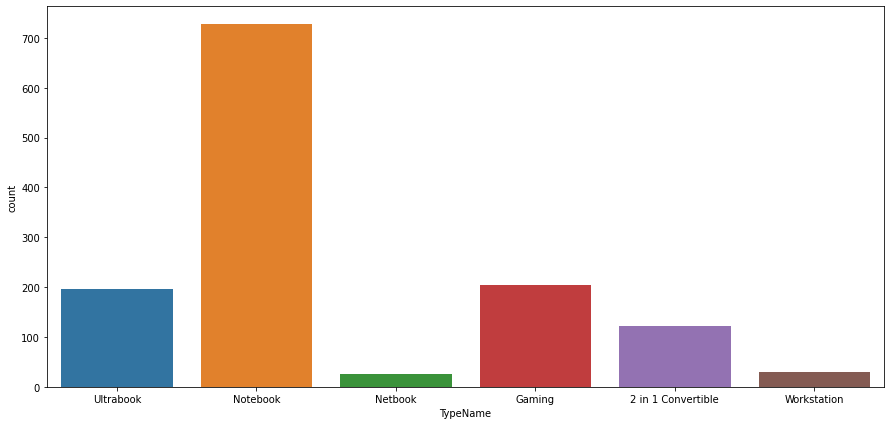

In [40]:
plt.figure(figsize=(15,7))
sn.countplot(x=df['TypeName'])

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

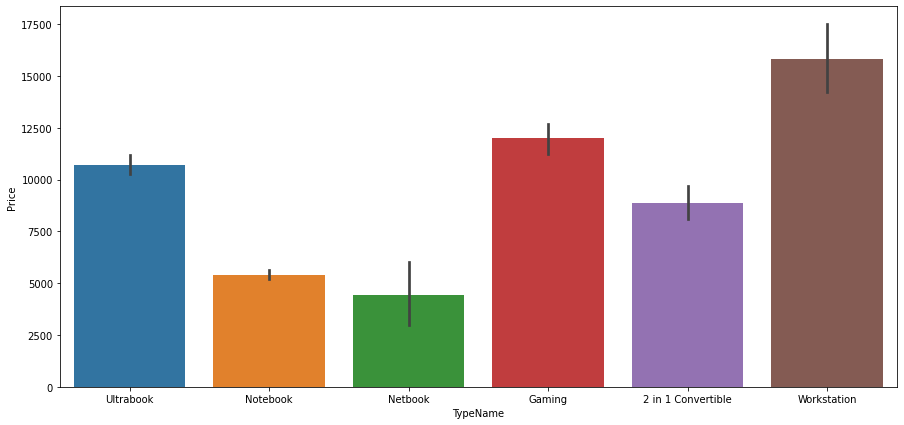

In [41]:
plt.figure(figsize=(15,7))
sn.barplot(x = 'TypeName',y= 'Price',data=df)

Notebooks have the least amount of variation in price compared to other laptop types, this is probably a results from the high number of notebooks and competitors in the market.
Also the high price of workstation and the low number of units sold shows that workstations are more of a niche product.

#### Lets take a look at the `ScreenResolution` column

In [42]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

This column has three type of data in it:
- _TouchScreen_,
- _Max Screen Resolution_ (i.e. Full HD 2560x1440 ...)
- and _display panel_ (IPS or TN Panels).

We need to separate this information into different columns. To do that we will one-hot encode some of this data, meaning we will convert each categorical (Touchscreen and Display) value into a new categorical column and assign a binary value of 1 or 0 to those columns.

Why '1 and 0' and not 'Yes' and 'No'? because we will give this data to an algorithm to learn from therefore '1 and 0' are the best choice.

##### Starting with _TouchScreen_:

In [43]:
df["TouchScreen"]=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['ScreenResolution']=df['ScreenResolution'].replace(regex={r"[/] Touchscreen":""})
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (kg),Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,4419.0432,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,10382.6736,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,1586.1456,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,5291.7696,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,2555.8416,0


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

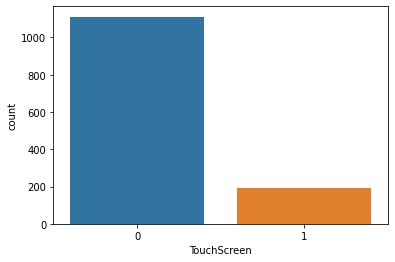

In [44]:
sn.countplot(x='TouchScreen',data=df)

As we can see most laptops in this dataset don't have a TouchScreen, just 192 have this functionality

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

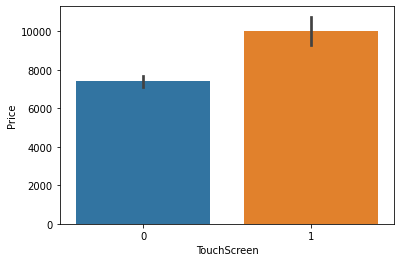

In [47]:
sn.barplot(x = 'TouchScreen',y= 'Price',data=df)

Price of laptops with touchscreen is subjected to alot of variation avreging at 10009.37, in contrast to normal ones that have an average price of about 7753.11

let see how each type of laptop 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

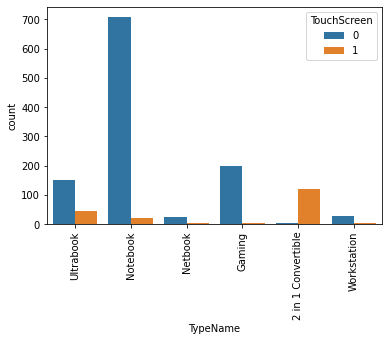

In [52]:
sn.countplot(x="TypeName", hue="TouchScreen", data=df)
plt.xticks(rotation='vertical')

In [53]:
pd.crosstab(index=df['TouchScreen'], columns=df['TypeName'])

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
TouchScreen,,,,,,
0,2,200,23,708,151,27
1,119,5,2,19,45,2


As we can see most of the laptops that have a Touchscreen are 2 in 1 Convertible, we can also see the most popular laptop type don't usual come with touch screen.

We could say that Touchscreen are mostly a luxury for laptop users